<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 2

## 🌻 Welcome to Chapter 2, "Biases and Data Augmentation"


In this chapter, we’ll cover the following primary topics. 

- Computational Biases 

- Human Biases 

- Systemic Biases 

- Deep Dive to Image Augmentation Biases 

- Deep Dive to Text Augmentation Biases 

## Set up: Bring back Pluto

### ✋ STOP

- There are two methods to bring back Pluto.

1. Clone from GitHut (or update by doing "git pull if you have clone it before)

2. Or retrieve from an URL. The URL can be the GitHub URL or an URL the you store your Pluto python file from the first lesson.

- Do one, but not both.



### GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [2]:
#url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 296 (delta 77), reused 74 (delta 23), pack-reused 106
Receiving objects: 100% (296/296), 268.64 MiB | 35.06 MiB/s, done.
Resolving deltas: 100% (126/126), done.


### Fetch file from URL

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [3]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [4]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

- Wake up Pluto

In [5]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_1.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


- Double check on the server environments

In [6]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/11/20 06:20
                    Platform : linux
     Pluto Version (Chapter) : 1.0
             Python (3.7.10) : actual: 3.7.15 (default, Oct 12 2022, 19:14:55) [GCC 7.5.0]
            PyTorch (1.11.0) : actual: 1.12.1+cu113
              Pandas (1.3.5) : actual: 1.3.5
                 PIL (9.0.0) : actual: 7.1.2
          Matplotlib (3.2.2) : actual: 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


- Copy the Pluto chapter 1 to begin chapter 2

In [7]:
pluto_chapter_2 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
!cp {pluto_file} {pluto_chapter_2}

# Fetch Kaggle Data

In [8]:
# easy method to download kaggle data files
!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22


In [9]:
# %%writefile -a {pluto_chapter_2}

# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------
#
# !pip install opendatasets --upgrade
# import opendatasets
# print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)
# 
# !pip install pyspellchecker 
# import spellchecker
# print("\nRequired version 0.7+", spellchecker.__version__)
#
# # STOP: Update your Kaggle access username or key first.
# pluto.remember_kaggle_access_keys("your_kaggle_name", "your_kaggle_key")
# pluto._write_kaggle_credit()
# import kaggle
#
# @add_method(PacktDataAug)
# def fetch_kaggle_comp_data(self,cname):
#   #self._write_kaggle_credit()  # need to run only once.
#   path = pathlib.Path(cname)
#   kaggle.api.competition_download_cli(str(path))
#   zipfile.ZipFile(f'{path}.zip').extractall(path)
#   return
# 
# @add_method(PacktDataAug)
# def fetch_kaggle_dataset(self,url,dest="kaggle"):
#   #self._write_kaggle_credit()    # need to run only once.
#   opendatasets.download(url,data_dir=dest)
#   return
# # -------------------- : --------------------


### Define Kaggle Download Functions

✋ STOP

- Sign up on kaggle.com and get username ad key

In [10]:
# %%writefile -a {pluto_chapter_2}

pluto.version = 2.0
@add_method(PacktDataAug)
def remember_kaggle_access_keys(self,username,key):
  self.kaggle_username = username
  self.kaggle_key = key
  return

In [11]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def _write_kaggle_credit(self):
  creds = '{"username":"'+self.kaggle_username+'","key":"'+self.kaggle_key+'"}'
  kdirs = ["~/.kaggle/kaggle.json", "./kaggle.json"]
  #
  for k in kdirs:
    cred_path = pathlib.Path(k).expanduser()
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)
  import kaggle
  #
  return
#
@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return
#
#
@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return

In [12]:
# must run later in chapter 3
pluto.remember_kaggle_access_keys("duchaba", "059d7f10e1838693868b30e9dbb7c8ce")
pluto._write_kaggle_credit()
import kaggle

### Fetch and display State Farm Kaggle competition data

In [13]:
# %%writefile -a {pluto_chapter_2}

import zipfile
import os

In [14]:
kaggle_competition_name = "state-farm-distracted-driver-detection"
pluto.fetch_kaggle_comp_data(kaggle_competition_name)

100%|██████████| 4.00G/4.00G [00:28<00:00, 148MB/s]


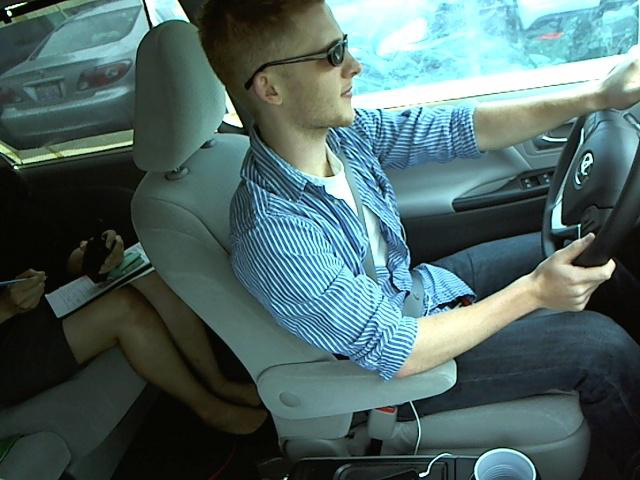

In [15]:
# quick view one image
f = 'state-farm-distracted-driver-detection/imgs/train/c0/img_100026.jpg'
img = PIL.Image.open(f)
display(img)

### Convert to Pandas DataFrame

In [16]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def fetch_df(self, csv):
  df = pandas.read_csv(csv, encoding='latin-1')
  return df

In [17]:
f = 'state-farm-distracted-driver-detection/driver_imgs_list.csv'
pluto.df_sf_data = pluto.fetch_df(f)
pluto.df_sf_data.tail(3)

subject classname            img
22421    p081        c9  img_25946.jpg
22422    p081        c9  img_67850.jpg
22423    p081        c9   img_9684.jpg

In [18]:
pluto.df_sf_data.describe()

subject classname            img
count    22424     22424          22424
unique      26        10          22424
top       p021        c0  img_44733.jpg
freq      1237      2489              1

In [19]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def build_sf_fname(self, df):
  root = 'state-farm-distracted-driver-detection/imgs/train/'
  df["fname"] = root + df.classname + '/' + df.img
  return

In [20]:
pluto.build_sf_fname(pluto.df_sf_data)
pluto.df_sf_data.head(3)

subject classname            img  \
0    p002        c0  img_44733.jpg   
1    p002        c0  img_72999.jpg   
2    p002        c0  img_25094.jpg   

                                               fname  
0  state-farm-distracted-driver-detection/imgs/tr...  
1  state-farm-distracted-driver-detection/imgs/tr...  
2  state-farm-distracted-driver-detection/imgs/tr...

- Verify the fname is correct

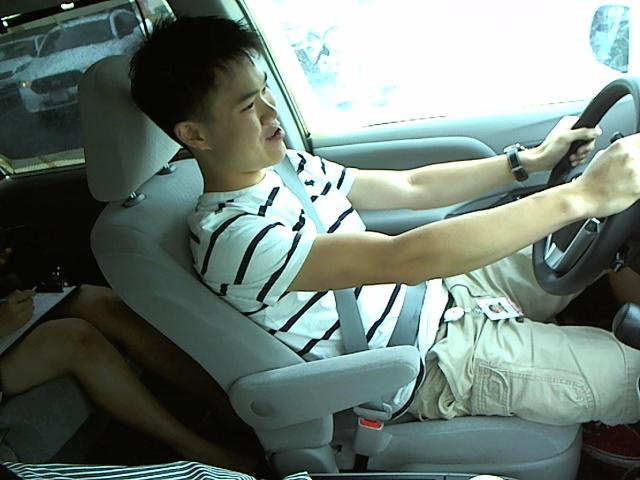

In [21]:
img = PIL.Image.open(pluto.df_sf_data.fname[0])
display(img)

# Draw the Images

In [22]:
# %%writefile -a {pluto_chapter_2}

# set internal counter for image to be zero, e.g. pluto0.jpg, pluto1.jpg, etc.
pluto.fname_id = 0

In [23]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def _drop_image(self,canvas, fname=None,format=".jpg",dname="Data-Augmentation-with-Python/pluto_img"):
  if (fname is None):
    self.fname_id += 1
    if not os.path.exists(dname):
      os.makedirs(dname)
    fn = f'{dname}/pluto{self.fname_id}{format}'
  else:
    fn = fname
  canvas.savefig(fn, cmap="Greys", bbox_inches="tight", pad_inches=0.25)
  return
#
@add_method(PacktDataAug)
def draw_batch(self,df_filenames, disp_max=10,is_shuffle=False, figsize=(16,8)):
  disp_col = 5
  disp_row = int(numpy.round((disp_max/disp_col)+0.4, 0))
  _fns = list(df_filenames)
  if (is_shuffle):
    numpy.random.shuffle(_fns)
  k = 0
  clean_fns = []
  if (len(_fns) >= disp_max):
    canvas, pic = matplotlib.pyplot.subplots(disp_row,disp_col, figsize=figsize)
    for i in range(disp_row):
      for j in range(disp_col):
        try:
          im = PIL.Image.open(_fns[k])
          pic[i][j].imshow(im)
          pic[i][j].set_title(pathlib.Path(_fns[k]).name)
          clean_fns.append(_fns[k])
        except:
          pic[i][j].set_title(pathlib.Path(_fns[k]).name)
        k += 1
    canvas.tight_layout()
    self._drop_image(canvas)
    canvas.show()
  else:
    print("**Warning: the length should be more then ", disp_max, ". The given length: ", len(_fns))
  return clean_fns

## State Farm

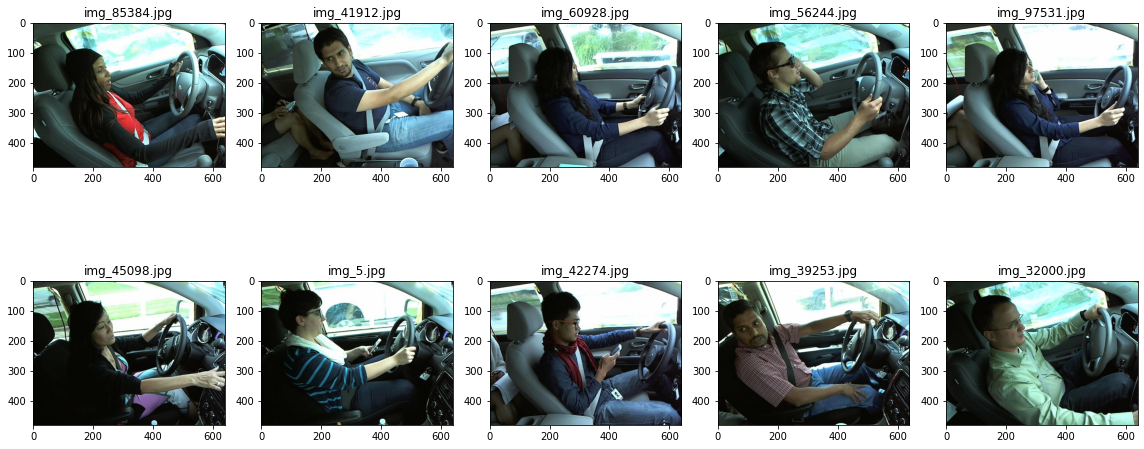

In [24]:
x = pluto.draw_batch(pluto.df_sf_data["fname"], is_shuffle=True)

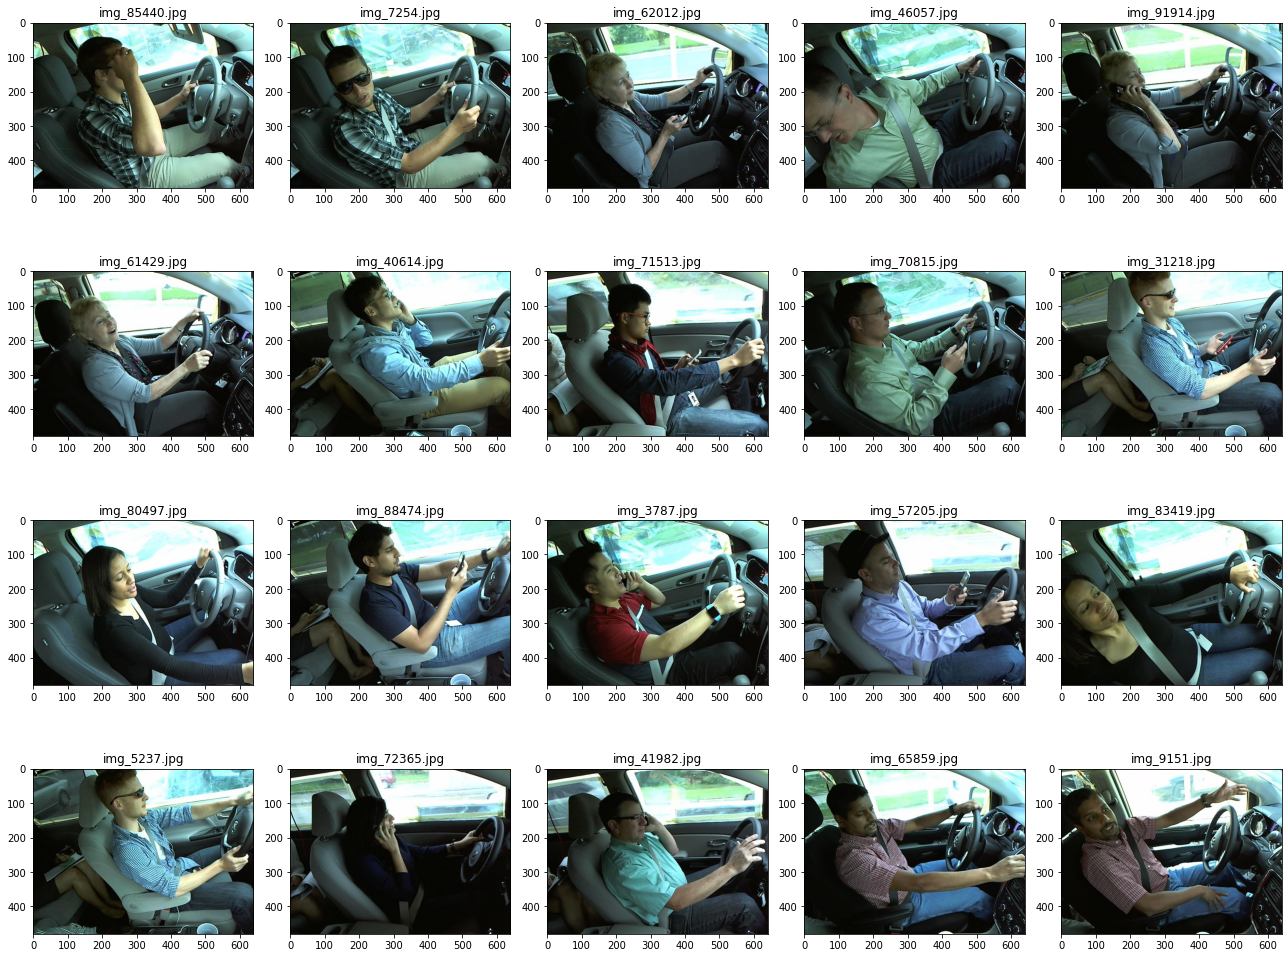

In [25]:
x = pluto.draw_batch(pluto.df_sf_data["fname"], is_shuffle=True,disp_max=20,figsize=(18,14))

## Nike Shoe

- For Nike, Adidas and Converse Shoes Images

In [26]:
url = 'https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 15.6M/15.6M [00:00<00:00, 105MB/s] 

In [27]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def build_shoe_fname(self, start_path):
  df = pandas.DataFrame()
  for root, dirs, files in os.walk(start_path, topdown=False):
   for name in files:
      f = os.path.join(root, name)
      p = pathlib.Path(f).parent.name 
      d = pandas.DataFrame({'fname': [f], 'label': [p]})
      df = df.append(d, ignore_index=True)
  #
  # clean it up
  df = df.reset_index(drop=True)
  return df
#
# create the same with a generic function name
@add_method(PacktDataAug)
def make_dir_dataframe(self, start_path):
  return self.build_shoe_fname(start_path)

In [28]:
f = 'kaggle/nike-adidas-and-converse-imaged/train'
pluto.df_shoe_data = pluto.build_shoe_fname(f)
pluto.df_shoe_data.head(3)

fname   label
0  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas
1  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas
2  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas

In [29]:
# f = 'kaggle/nike-adidas-and-converse-imaged/train'
# pluto.df_shoe_data = pluto.make_dir_dataframe(f)
# pluto.df_shoe_data.head(3)

In [30]:
pluto.df_shoe_data.tail(3)

fname     label
708  kaggle/nike-adidas-and-converse-imaged/train/c...  converse
709  kaggle/nike-adidas-and-converse-imaged/train/c...  converse
710  kaggle/nike-adidas-and-converse-imaged/train/c...  converse

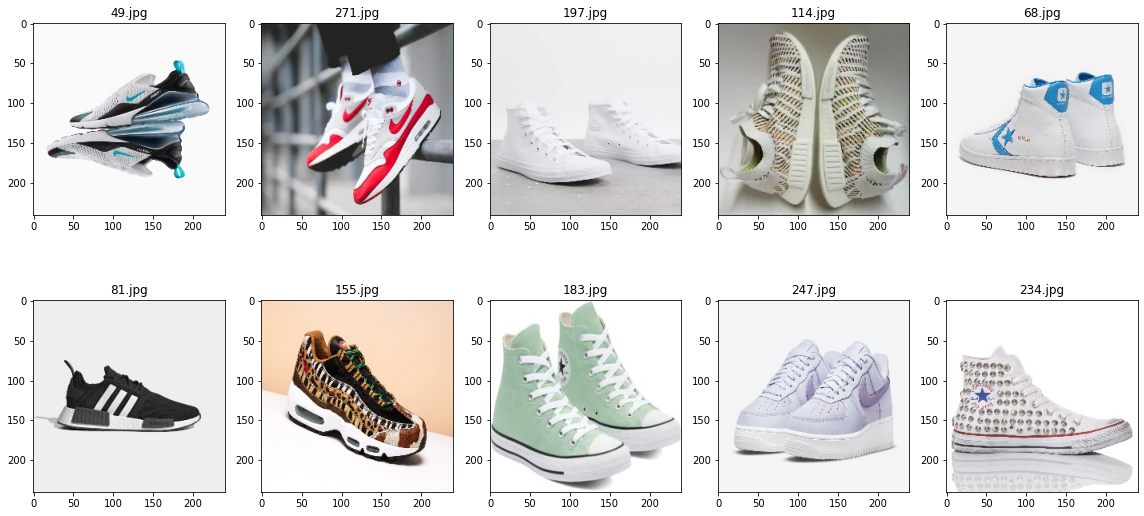

In [31]:
x = pluto.draw_batch(pluto.df_shoe_data["fname"], is_shuffle=True)

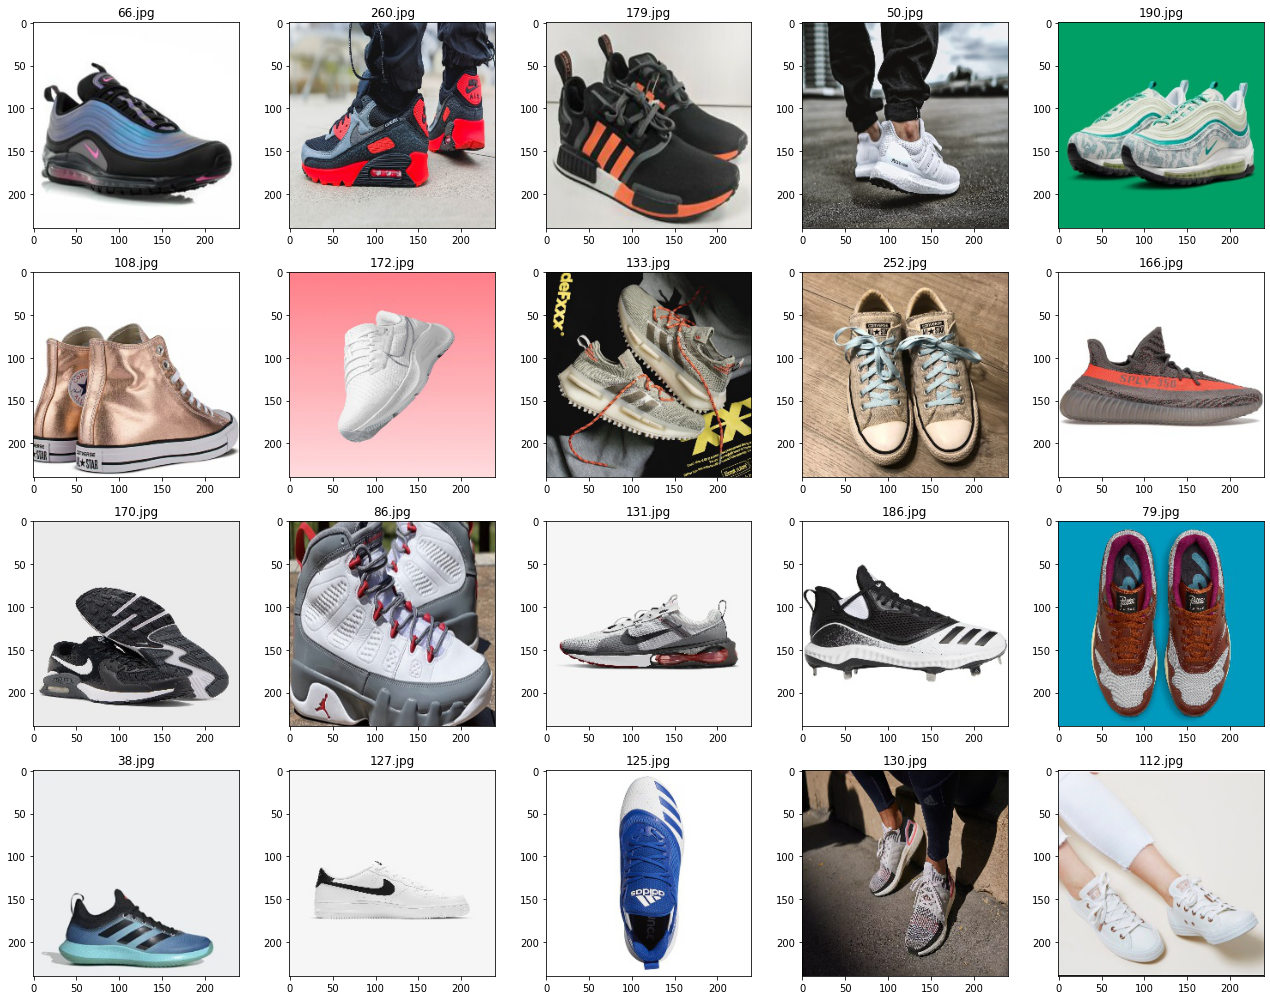

In [32]:
x = pluto.draw_batch(pluto.df_shoe_data["fname"], is_shuffle=True,disp_max=20,figsize=(18,14))

## Grapevine Images

In [33]:
#
%%time
url = "https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset"
pluto.fetch_kaggle_dataset(url)

100%|██████████| 109M/109M [00:00<00:00, 147MB/s]



CPU times: user 1.03 s, sys: 360 ms, total: 1.39 s
Wall time: 2.3 s


In [34]:
!ls -la kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset

total 32
drwxr-xr-x 7 root root 4096 Nov 20 06:21 .
drwxr-xr-x 3 root root 4096 Nov 20 06:21 ..
drwxr-xr-x 2 root root 4096 Nov 20 06:21 Ak
drwxr-xr-x 2 root root 4096 Nov 20 06:21 Ala_Idris
drwxr-xr-x 2 root root 4096 Nov 20 06:21 Buzgulu
drwxr-xr-x 2 root root 4096 Nov 20 06:21 Dimnit
-rw-r--r-- 1 root root 2608 Nov 20 06:21 Grapevine_Leaves_Image_Dataset_Citation_Request.txt
drwxr-xr-x 2 root root 4096 Nov 20 06:21 Nazli


In [35]:
f = 'kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ak'
!ls -la {f} | head

total 20888
drwxr-xr-x 2 root root   4096 Nov 20 06:21 .
drwxr-xr-x 7 root root   4096 Nov 20 06:21 ..
-rw-r--r-- 1 root root 204438 Nov 20 06:21 Ak (100).png
-rw-r--r-- 1 root root 120623 Nov 20 06:21 Ak (10).png
-rw-r--r-- 1 root root 320960 Nov 20 06:21 Ak (11).png
-rw-r--r-- 1 root root 113495 Nov 20 06:21 Ak (12).png
-rw-r--r-- 1 root root 283302 Nov 20 06:21 Ak (13).png
-rw-r--r-- 1 root root 111328 Nov 20 06:21 Ak (14).png
-rw-r--r-- 1 root root 230239 Nov 20 06:21 Ak (15).png


- remove all space in file name

In [36]:
# run this until no error/output
f2 = 'kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset'
!find {f2} -name "* *" -type f | rename 's/ /_/g'

In [37]:
!ls -la {f} | head

total 20888
drwxr-xr-x 2 root root   4096 Nov 20 06:21 .
drwxr-xr-x 7 root root   4096 Nov 20 06:21 ..
-rw-r--r-- 1 root root 204438 Nov 20 06:21 Ak_(100).png
-rw-r--r-- 1 root root 120623 Nov 20 06:21 Ak_(10).png
-rw-r--r-- 1 root root 320960 Nov 20 06:21 Ak_(11).png
-rw-r--r-- 1 root root 113495 Nov 20 06:21 Ak_(12).png
-rw-r--r-- 1 root root 283302 Nov 20 06:21 Ak_(13).png
-rw-r--r-- 1 root root 111328 Nov 20 06:21 Ak_(14).png
-rw-r--r-- 1 root root 230239 Nov 20 06:21 Ak_(15).png


In [38]:
f = 'kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt'
!cat {f}

DATASET: https://www.muratkoklu.com/datasets/

KOKLU Murat (a), UNLERSEN M. Fahri (b), OZKAN Ilker Ali (a), ASLAN M. Fatih(c), SABANCI Kadir (c)

(a) Department of Computer Engineering, Selcuk University, Turkey, Konya, Turkey
(b) Department of Electrical and Electronics Engineering, Necmettin Erbakan University, Konya, Turkey
(c) Department of Electrical-Electronic Engineering, Karamanoglu Mehmetbey University, Karaman, Turkey

Citation Request :
Koklu, M., Unlersen, M. F., Ozkan, I. A., Aslan, M. F., & Sabanci, K. (2022). A CNN-SVM study based on selected deep features for grapevine leaves classification. Measurement, 188, 110425. Doi:https://doi.org/10.1016/j.measurement.2021.110425

Link: https://doi.org/10.1016/j.measurement.2021.110425

DATASET: https://www.muratkoklu.com/datasets/

Highlights
• Classification of five classes of grapevine leaves by MobileNetv2 CNN Model.
• Classification of features using SVMs with different kernel functions.
• Implementing a feature selection al

In [39]:
!mv {f} .

- The grapevine image structure is the same as the shoe image.
  - folder name is the label
  - the images are in their respected folder
  - No csv file

In [40]:
f = 'kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset'
pluto.df_grapevine_data = pluto.build_shoe_fname(f)
pluto.df_grapevine_data.head(3)

fname    label
0  kaggle/grapevine-leaves-image-dataset/Grapevin...  Buzgulu
1  kaggle/grapevine-leaves-image-dataset/Grapevin...  Buzgulu
2  kaggle/grapevine-leaves-image-dataset/Grapevin...  Buzgulu

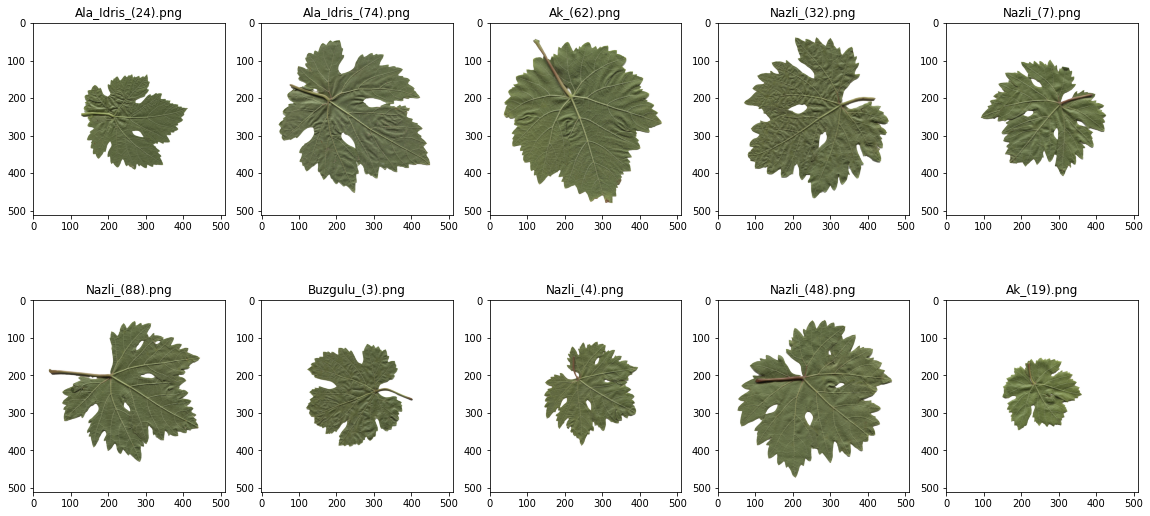

In [41]:
x = pluto.draw_batch(pluto.df_grapevine_data["fname"], is_shuffle=True)

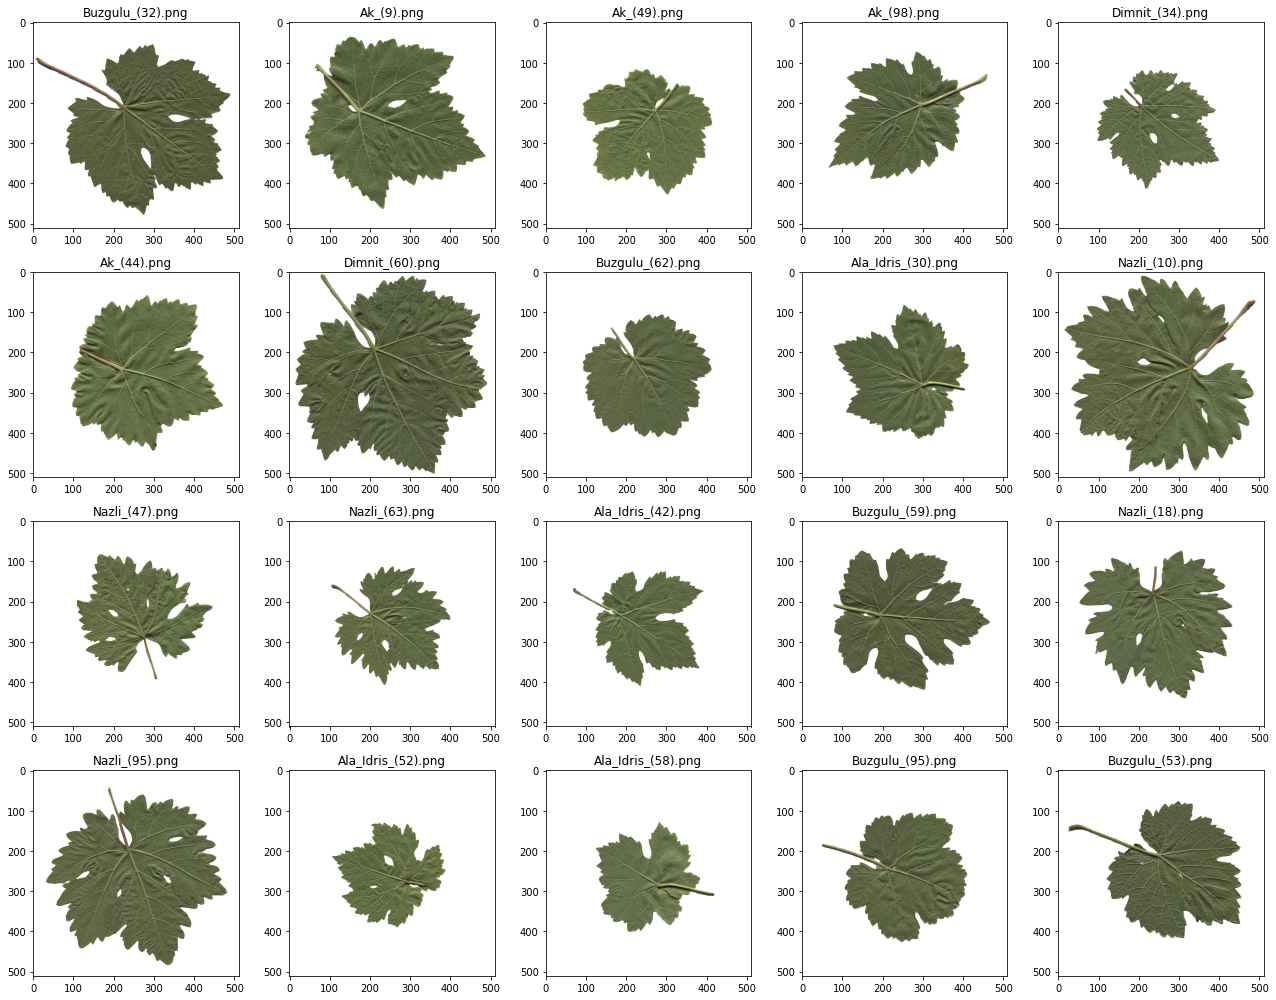

In [42]:
x = pluto.draw_batch(pluto.df_grapevine_data["fname"], is_shuffle=True,disp_max=20,figsize=(18,14))

# Monkeypox (optional for Notebook only)

- Uncoment before run.

In [43]:
# # quick view one image
# f = 'kaggle/monkeypox-skin-lesion-dataset/Original Images/Original Images/Monkey Pox/M01_03.jpg'
# img = PIL.Image.open(f)
# display(img)

In [44]:
# f = 'kaggle/monkeypox-skin-lesion-dataset/Augmented Images/Augmented Images/Monkeypox_augmented/M01_01_02.jpg'
# img = PIL.Image.open(f)
# display(img)

In [45]:
# f = 'kaggle/monkeypox-skin-lesion-dataset/Monkeypox_Dataset_metadata.csv'
# pluto.df_monkey_data = pluto.fetch_df(f)
# pluto.df_monkey_data.tail(3)

- Run this until No error
- 3 times for monkeypox 

In [46]:
# !find . -name "* *" -type d | rename 's/ /_/g'

In [47]:
# # %write -a {pluto_chapter_2}

# @add_method(PacktDataAug)
# def build_monkey_fname(self, df):
#   url_monkey = 'kaggle/monkeypox-skin-lesion-dataset/Original_Images/Original_Images/Monkey_Pox/'
#   url_other = 'kaggle/monkeypox-skin-lesion-dataset/Original_Images/Original_Images/Others/'
#   df["fname"] = url_monkey + df.ImageID + ".jpg"
#   # quick replace other
#   df.loc[df['Label'] == 'Non Monkeypox', 'fname'] = url_other + df.ImageID + ".jpg"
#   return


In [48]:
# pluto.build_monkey_fname(pluto.df_monkey_data)
# pluto.df_monkey_data.head(3)

In [49]:
# pluto.df_monkey_data.tail(3)

- Draw it

In [50]:
# x = pluto.draw_batch(pluto.df_monkey_data["fname"], is_shuffle=True)

In [51]:
# x = pluto.draw_batch(pluto.df_monkey_data["fname"], is_shuffle=True,disp_max=20,figsize=(18,14))

# NLP (Text) data

## NetFlix

In [52]:
%%time
url = 'https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.34M/1.34M [00:00<00:00, 129MB/s]


CPU times: user 64.7 ms, sys: 11.4 ms, total: 76.2 ms
Wall time: 439 ms


In [53]:
f = 'kaggle/dataset-netflix-shows/netflix_titles.csv'
pluto.df_netflix_data = pluto.fetch_df(f)
pluto.df_netflix_data.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [54]:
print(pluto.df_netflix_data.description[0])

As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.


In [55]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def print_batch_text(self,df_orig, disp_max=10, cols=["title", "description"]): 
  df = df_orig[cols] 
  with pandas.option_context("display.max_colwidth", None):
    display(df.sample(disp_max))
  return


In [56]:
pluto.print_batch_text(pluto.df_netflix_data)

title  \
7835                   Razia Sultan   
6401                  Cain and Abel   
2387                   4th Republic   
4189                       Lavender   
6657                  Earth to Echo   
3951                          Jagat   
7078                       Inkheart   
206       LSD: Love, Sex Aur Dhokha   
6028         A Billion Colour Story   
7018  How to Make an American Quilt   

                                                                                                                                                description  
7835                     This sweeping historical drama charts the rise of a remarkable real-life figure, the first woman to ever rule the Delhi Sultanate.  
6401       Gifted doctor Cho-in leads a charmed life while his older brother Seon-woo seethes with jealousy in this series inspired by Biblical characters.  
2387       After the election-night murder of her campaign manager at a polling site, a gubernatorial candidate challenges the corrupt incumbent's victory.  
4189  Before one of them moves to the U.S., two childhood friends promise to reunite as adults. But illness and the vagaries of the heart stand in the way.  
6657             When a construction project begins in their neighborhood, four friends start receiving bizarre encoded text messages on their cell phones.  
3951      In early 1990s Malaysia, a Tamilian boy faces pressure from his immigrant father to focus on school but is drawn to his unclesâ lives of crime.  
7078              Unbeknownst to his 12-year-old daughter, a bookbinder has a secret ability to bring characters to life by reading their stories out loud.  
206                           This provocative drama examines how the voyeuristic nature of modern society affects three unusual couples in Northern India.  
6028                     The curious child of idealistic interfaith parents observes an increasingly intolerant world as his family faces financial strain.  
7018           A conflicted young woman spends the summer with her grandmother, her great-aunt and their quilting circle, whose life stories captivate her.

In [57]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def count_word(self, df, col_dest="description"):
  df['wordc'] = df[col_dest].apply(lambda x: len(x.split()))
  return

In [58]:
pluto.count_word(pluto.df_netflix_data)
pluto.df_netflix_data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  wordc  
0  As her father nears the end of his life, filmm...     27  
1  After crossing paths at a party, a Cape Town t...     27  
2  To protect his family from a powerful drug lor...     27  
3  Feuds, flirtations and toilet talk go down amo...     24  
4  In a city of coaching centers known to train I...     24

In [67]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def draw_word_count(self,df, wc='wordc',is_stack_verticle=True):
  if (is_stack_verticle):
    canvas, pic = matplotlib.pyplot.subplots(2,1, figsize=(8,10))
  else:
    canvas, pic = matplotlib.pyplot.subplots(1,2, figsize=(16,5))
  df.boxplot(ax=pic[0],column=[wc],vert=False,color="black")
  df[wc].hist(ax=pic[1], color="cornflowerblue", alpha=0.9)
  #
  title=["Description BoxPlot", "Description Histogram"]
  yaxis=["Description", "Stack"]
  x1 = f'Word Count: Mean: {df[wc].mean():0.2f}, Min: {df[wc].min()}, Max: {df[wc].max()}'
  xaxis=[x1, "Word Count"]
  #
  pic[0].set_title(title[0], fontweight ="bold")
  pic[1].set_title(title[1], fontweight ="bold")
  pic[0].set_ylabel(yaxis[0])
  pic[1].set_ylabel(yaxis[1])
  pic[0].set_xlabel(xaxis[0])
  pic[1].set_xlabel(xaxis[1])
  #
  canvas.tight_layout()
  self._drop_image(canvas)
  # 
  canvas.show()
  return

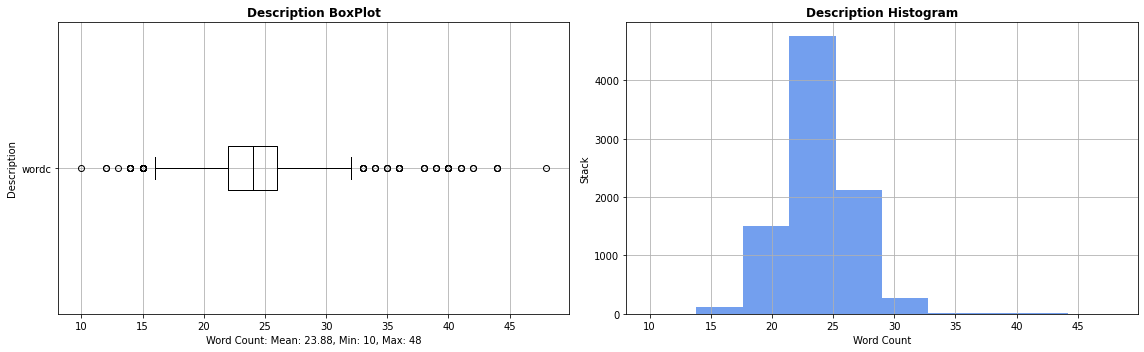

In [68]:
pluto.draw_word_count(pluto.df_netflix_data, is_stack_verticle=False)

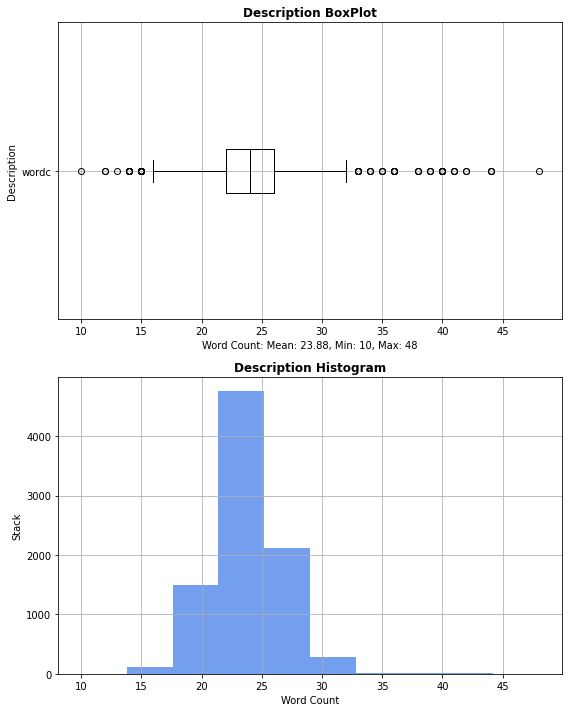

In [69]:
pluto.draw_word_count(pluto.df_netflix_data)

## Spell checker

In [70]:
!pip install pyspellchecker 
import spellchecker
pluto._pp("Required version 0.7+", spellchecker.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.0 MB/s 
       Required version 0.7+ : 0.7.0


In [71]:
# %%writefile -a {pluto_chapter_2}

import re
@add_method(PacktDataAug)
def _strip_punc(self,s):
  p = re.sub(r'[^\w\s]','',s)
  return(p)
#
@add_method(PacktDataAug)
def check_spelling(self,df, col_dest='description'):
  spell = spellchecker.SpellChecker()
  df["misspelled"] = df[col_dest].apply(lambda x: spell.unknown(self._strip_punc(x).split()))
  df["misspelled_count"] = df["misspelled"].apply(lambda x: len(x))
  return

In [72]:
pluto.check_spelling(pluto.df_netflix_data)

In [73]:
pluto.print_batch_text(pluto.df_netflix_data,cols=['title', 'description', 'misspelled'])

title  \
243         Everything Will Be Fine   
7911               S Is for Stanley   
5821                Children of God   
1431                    Stuck Apart   
5610  David Brent: Life on the Road   
206       LSD: Love, Sex Aur Dhokha   
6523                     Compulsion   
7885                   Roh's Beauty   
7463                  Miss Dynamite   
4101                      Candyflip   

                                                                                                                                                  description  \
243    A separated couple live together for their child's sake in this satirical dramedy about what it means to be a good parent and spouse in today's world.   
7911   This film examines the complex life of iconic filmmaker Stanley Kubrick, as seen through the eyes of his devoted longtime driver, Emilio D'Alessandro.   
5821    A former member examines the lingering effects of being raised in the Family, a cult whose disturbing practices include the sexual abuse of children.   
1431     Entrenched in a midlife crisis, Aziz seeks solace from his mundane job, lonesome friends and rowdy family while pretending to have his act together.   
5610      With "The Office" long in the past, middling salesman David Brent ditches work and goes on tour with his rock band in a disastrous stab at stardom.   
206                             This provocative drama examines how the voyeuristic nature of modern society affects three unusual couples in Northern India.   
6523    Lured to a majestic, remote villa by an old lover, an erotic novelist finds herself falling for a mysterious woman and descending into a moral abyss.   
7885                                   Hoping to earn money to support her son, a single mother sings in a nightclub, where danger lurks around every corner.   
7463    Wealthy, beautiful Valentina falls in love, only to realize that her man and her family are involved with one of Mexico's most powerful drug cartels.   
4101  On the incandescent shores of Goa, a young man tumbles down a mind-bending â and soon dangerous â series of trips after taking hallucinatory drugs.   

                  misspelled  
243        {todays, dramedy}  
7911  {dalessandro, kubrick}  
5821                      {}  
1431                      {}  
5610                      {}  
206                       {}  
6523                      {}  
7885                      {}  
7463               {mexicos}  
4101        {mindbending, â}

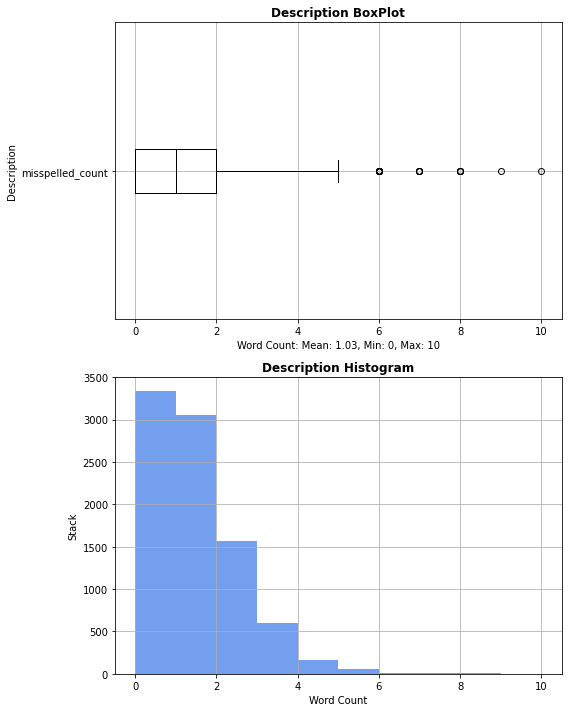

In [74]:
pluto.draw_word_count(pluto.df_netflix_data,wc='misspelled_count')

## Amazon review

In [75]:
%%time
url = 'https://www.kaggle.com/datasets/tarkkaanko/amazon'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 582k/582k [00:00<00:00, 106MB/s]


CPU times: user 52.3 ms, sys: 5.21 ms, total: 57.5 ms
Wall time: 379 ms


In [76]:
f = 'kaggle/amazon/amazon_reviews.csv'
pluto.df_amazon_data = pluto.fetch_df(f)
pluto.df_amazon_data.head(3)

Unnamed: 0 reviewerName  overall  \
0           0          NaN      4.0   
1           1         0mie      5.0   
2           2          1K3      4.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   

   score_average_rating  wilson_lower_bound  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0

In [77]:
# there is a "nan" in the amazon data, so drop/delete it.
pluto.df_amazon_data = pluto.df_amazon_data.dropna()

In [78]:
pluto.check_spelling(pluto.df_amazon_data,col_dest='reviewText')

In [79]:
pluto.print_batch_text(pluto.df_amazon_data, cols=['reviewerName', 'reviewText','misspelled'])

reviewerName  \
4652              Troy  N.Stennett   
2743                  K. Rodriguez   
4829  Willie Vargas "WillieVargas"   
1959                            :)   
2402                  John Coleman   
1305               Dennis Peterson   
3355                      MusicBro   
1157                      Danny V.   
3022                          maso   
899   Chaos2u "Reviewer Version 1"   

                                                                                                                                                                                                                                                                                                                                                                                                                                       reviewText  \
4652  I'm using this in a SAMSUNG GALAXY S3 16GB unlocked smartphone and the only problem is as you write more and more flies to the card it gets slower and slower to the point that you'll be so p.o at a crucial moment , say for example you want  to access a video  or doc , that when you do actually get your file you've lost  all faith in the card .So buy it for the capacity but always remember it's not reliable  for fast access.   
2743                                                                     This card only lasted two weeks before it began giving read errors. I used it in a dash cam and no matter how many times I formatted, it would only record for about a minute before failing again. I picked up a PNY card since and it has worked beautifully. Unfortunately, I've been swamped and forgot to return this card before my 30 days. Not happy about that!   
4829                                                                                                                                                                                                                                                                                                                                                                                                               exactly what it says and cheap   
1959                                                                                                                                                                                                                 Having a 32gb mirosd is great! I use it in my phone and hardly have to upload my pics and what not. My phone works faster with all the extra space and I never have to worry about needing to delete any songs,pics,or apps.   
2402                                                                                                                                                                                                                                                                                                  Works well in my GoPro even though it wasn't one of the GoPro recommended ones.  A good buy that has the speed for movies and big pictures.   
1305                                                                                                                                                                                                                                                                                                      Got here within a couple of days of ordering.  Easy to install and works great.  I wanted extra storage and this was right size for me.   
3355                                                                                                                                                       This is the best micro memory for an android phone! It's very fast running as fast as 38mb/s. The 30gb was a splurge but if you have movies or videos on your phone than this is perfect! Amazing product!P. S. Do not get the ultra mobile version of this, it's slower than this one   
1157                                                                                                       

In [80]:
pluto.count_word(pluto.df_amazon_data,col_dest='reviewText')

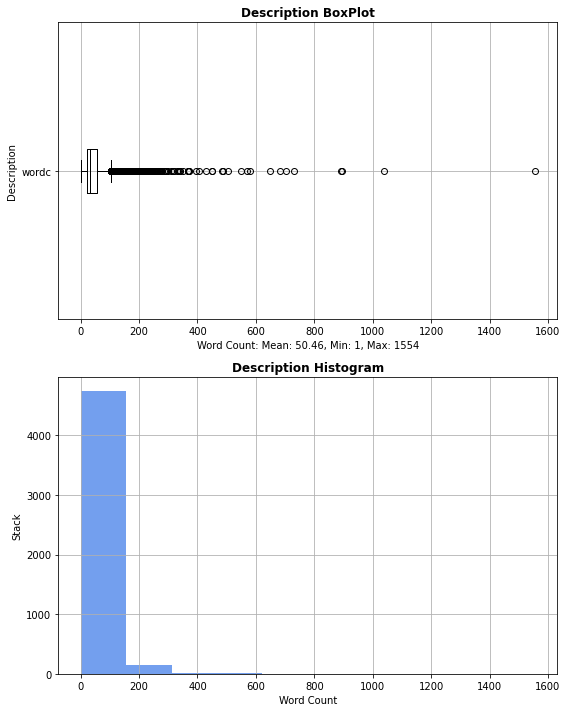

In [81]:
pluto.draw_word_count(pluto.df_amazon_data)

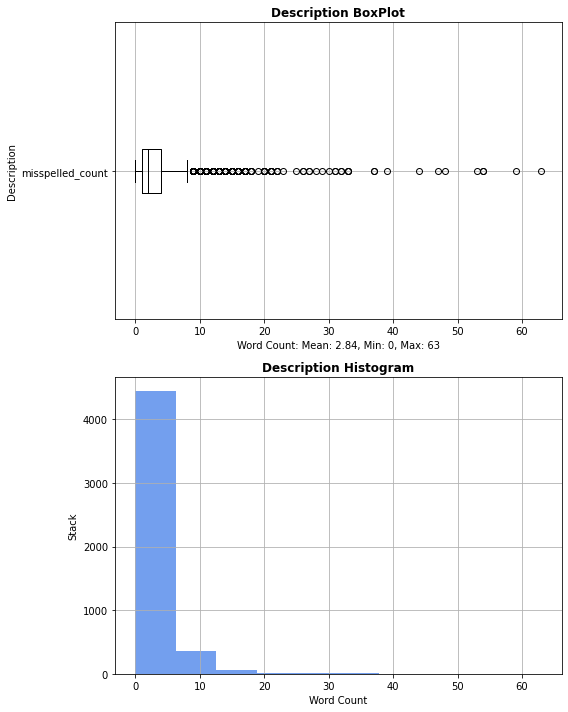

In [82]:
pluto.draw_word_count(pluto.df_amazon_data, wc='misspelled_count')

In [74]:
# end of chapter 2

# Push up all changes (optional)

- username: duchaba

- password: [use the token]

In [75]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
# !git add -A
# !git config --global user.email "duc.haba@gmail.com"
# !git config --global user.name "duchaba"
# !git commit -m "end of session"
# # do the git push in the xterm console
# #!git push

# Summary

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- I wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.



In [76]:
# !pip install colab-xterm
# %load_ext colabxterm
# %xterm